In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd
from scipy import stats

In [3]:
f = 'neuron_barcodes_fixed_keys.npz'
data = np.load(f, allow_pickle=True)

In [4]:
print(data.files)  


['arr_0']


In [5]:
barcode_data = data['arr_0'].item()

In [6]:
# trying to understand the data

print(type(barcode_data))

<class 'dict'>


In [7]:
barcode_data[87]

{'discrete': [236.36165391452698,
  4.73643878078149,
  249.47691446283415,
  5.205599687189211,
  134.294235727036,
  0.6806632419119066,
  136.61184280358475,
  16.869714264305333,
  233.45203803062407,
  195.99873181701955,
  210.56330272821614,
  219.02725043139137,
  10.869942731812657,
  235.4822690854587,
  225.90391327146116,
  97.50422197504912,
  3.6369971703690274,
  7.9269651952594895],
 'enhanced': [17.28785608840796,
  7.515577181315923,
  24.638676600028738,
  21.16953341341014,
  14.584511064694695,
  27.46376510648701,
  66.73333229113341,
  49.481932607112704,
  35.98993768592107,
  18.259919379244078,
  44.35916618231345,
  37.48961376571483,
  16.247664815039673,
  26.442108474114676,
  31.919274407318927,
  31.09246884736815,
  11.666781643779478,
  9.629698084868787],
 'raw': [2.930691624232975e-06,
  2.308364751744258e-06,
  5.363081093349226e-06,
  5.155474950218963e-06,
  3.365649719121816e-06,
  7.064497451913136e-06,
  1.6550727777302235e-05,
  1.264757228950

In [8]:
barcode_data[87]['discrete']

[236.36165391452698,
 4.73643878078149,
 249.47691446283415,
 5.205599687189211,
 134.294235727036,
 0.6806632419119066,
 136.61184280358475,
 16.869714264305333,
 233.45203803062407,
 195.99873181701955,
 210.56330272821614,
 219.02725043139137,
 10.869942731812657,
 235.4822690854587,
 225.90391327146116,
 97.50422197504912,
 3.6369971703690274,
 7.9269651952594895]

In [9]:
# number of neurites/objects in the sample
len(barcode_data)

369

In [10]:
discrete = np.array([obj_dict['discrete'] for obj_dict in barcode_data.values()])

print(discrete.shape, discrete[0])

# loops through barcode_data and gets the discrete values for each object
# creates a numpy array of the discrete values
# 369 neurites and 18 channels



(369, 18) [236.36165391   4.73643878 249.47691446   5.20559969 134.29423573
   0.68066324 136.6118428   16.86971426 233.45203803 195.99873182
 210.56330273 219.02725043  10.86994273 235.48226909 225.90391327
  97.50422198   3.63699717   7.9269652 ]


In [11]:
# axis 0 means that teh mean is being calulcating along the row so down each column

np.mean(discrete, axis=0)

array([48.3224047 , 28.16296201, 68.79938437, 10.71741746, 25.63121269,
       24.20722501, 27.31453624, 16.96581797, 56.83564698, 43.11875464,
       55.60345032, 44.74260489, 56.82273625, 57.98310909, 47.68063821,
       35.14774388, 42.47065039, 33.57345292])

In [12]:
# defining the threhold value
# here it is the mean of the discrete values

threshold = np.mean(discrete, axis=0)

# creating a binary mask where the threshold is applied to each channel
# if the value is greater than the threshold, it is 1, otherwise it is 0
thresholded = (discrete > threshold).astype(int)

In [13]:
print(thresholded.shape, thresholded[0])

(369, 18) [1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0]


In [14]:
# head of thresholded
thresholded[0:5]

array([[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

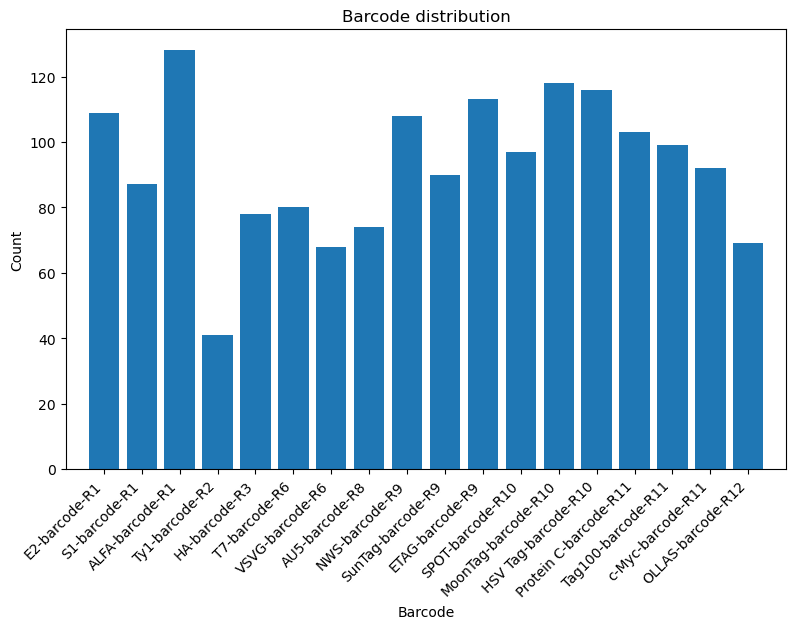

In [15]:
counts = thresholded.sum(axis=0)

num_columns = len(counts)
x_positions = np.arange(num_columns)

barcodes = [
    'E2-barcode-R1',
    'S1-barcode-R1',
    'ALFA-barcode-R1',
    'Ty1-barcode-R2',
    'HA-barcode-R3',
    'T7-barcode-R6',
    'VSVG-barcode-R6',
    'AU5-barcode-R8',
    'NWS-barcode-R9',
    'SunTag-barcode-R9',
    'ETAG-barcode-R9',
    'SPOT-barcode-R10',
    'MoonTag-barcode-R10',
    'HSV Tag-barcode-R10',
    'Protein C-barcode-R11',
    'Tag100-barcode-R11',
    'c-Myc-barcode-R11',
    'OLLAS-barcode-R12'
]

plt.figure(figsize=(8, 6))
plt.bar(x_positions, counts)
plt.xlim(-1, num_columns)
#plt.xticks(x_positions, x_positions)
plt.xticks(x_positions, barcodes, rotation=45, ha='right')
plt.tight_layout()
#plt.xlabel("Channel")
plt.xlabel("Barcode")
plt.ylabel("Count")
plt.title(f"Barcode distribution")
plt.show()

In [16]:
thresholded.shape[0]

369

## Plot: Barcode Distribution as %

[109  87 128  41  78  80  68  74 108  90 113  97 118 116 103  99  92  69] [29.53929539 23.57723577 34.68834688 11.11111111 21.13821138 21.6802168
 18.42818428 20.05420054 29.26829268 24.3902439  30.62330623 26.28726287
 31.97831978 31.43631436 27.91327913 26.82926829 24.93224932 18.69918699]


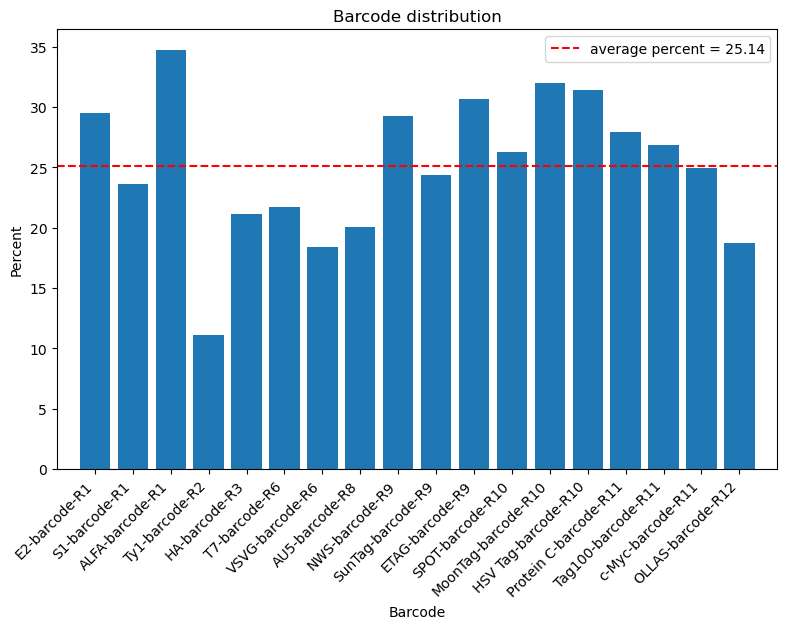

In [17]:
total_cells = thresholded.shape[0]
# 369 cells

y_axis = (counts / total_cells)*100
y_label = "Percent"

print(counts, y_axis)

plt.figure(figsize=(8, 6))
plt.bar(x_positions, y_axis)
plt.xlim(-1, num_columns)
#plt.xticks(x_positions, x_positions)
plt.xticks(x_positions, barcodes, rotation=45, ha='right')


avg = np.nanmean(y_axis, axis=0)
plt.axhline(
    avg,
    linestyle="--",
    color="red",
    label=f"average percent = {avg:.2f}",
)
plt.legend()

plt.tight_layout()
#plt.xlabel("Channel")
plt.xlabel("Barcode")
plt.ylabel("Percent")
plt.title(f"Barcode distribution")
plt.show()

In [18]:
# sum of 1s in each row (total channels expressed by each object)
# this is the number of channels expressed by each object
expressions_per_object = np.nansum(thresholded, axis=1)
print(expressions_per_object)

# mean and standard dev
mean_expressions = np.mean(expressions_per_object)
std_expressions = np.std(expressions_per_object)

print(f"mean: {mean_expressions}")
print(f"stddev: {std_expressions}")

threshold = 0.9

# threshold for being significantly more expressive, e.g expressing in more than 90% of the channels
channels_expressed = threshold * thresholded.shape[1]

print(channels_expressed)

[11  1  3  2 16  4  3  2  2  2  7 14  3  6 13  1  0  0 14 10 16  1 17 16
  5 15  1  3  4  7 14 17  3 10  4  0 17 16  6  7  8  6  4  8  3  2  1  0
  1  4  3  4  4  3  2  2  3  2  4  1  6  3  5  3  3  5  0  4  3  0  4  4
  3  3  3 10  2  2  1  3  7  5  4  8  6  5  5  8  1  3  0  5  7  1  4  2
  1  1  1  2  1  4  5  1  4  2  2  2  4  1  7  1  2  3  3  6  6  2  1  5
 11  1  5  5  5  9  7  6  1  4  7  8  2  2  1  2  8  0  5  4  7  5  2  3
  7  0  0  2 18  2  4  3  3  4  3  1  7 18  5  3  5  3  4  4  3  6  3  2
  2  3  5  7 14  4  7  4  3  4  3  5  4  8  4 12  1  3  4  1  6  6  7 17
  2  4  7  6  5  3  1  4 11 15  5  2  2  3  1  8  4  3  4  3  3  4  5  4
  3 18  3  5  4  2  7  2  3  3  7 10  5  2  3  8  5  1  2  6  0  6  5  7
  2  1  7  6  3  4  1  0  7  6  6  2  2  6  5  2  5  5 17  2  3  0  3  2
  5  2  4  5 18  5  3  2  3  6  5  0  5  2  4  3  1  0 17  3  2  6 18  4
  2 16  5  4  4  6  5  4  5  0  5  4  3  5  3  4  7  6  5 18  2  7  2  3
  2  5  4  3  3  2  3  6  6  1  3  2  1  1  8  1  8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


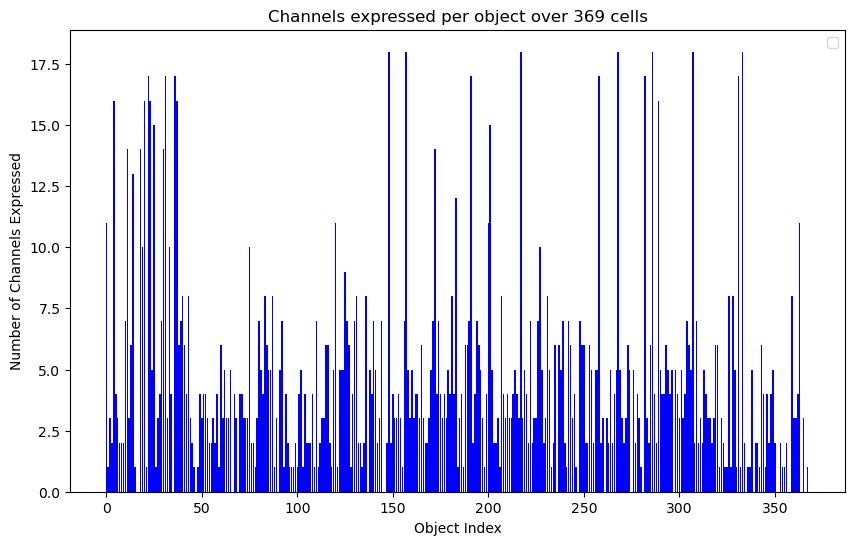

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(
    range(len(expressions_per_object)),
    expressions_per_object,
    color="blue",
)
plt.xlabel("Object Index")
plt.ylabel("Number of Channels Expressed")
plt.title(
    f"Channels expressed per object over"
    f" {total_cells} cells"
)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


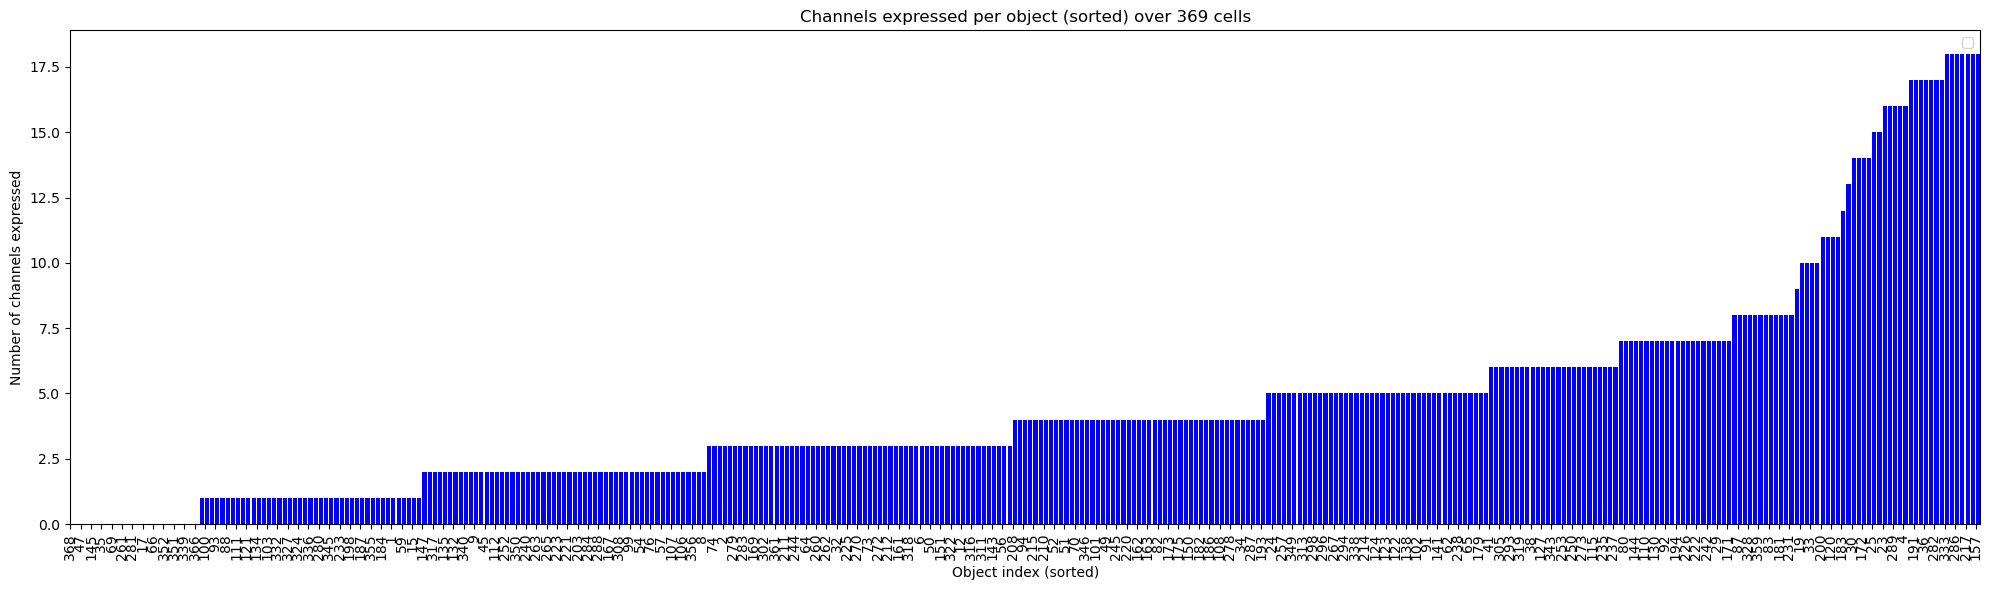

In [20]:
# sort objects by the number of channels expressed
sorted_indices = np.argsort(expressions_per_object)
sorted_expressions = expressions_per_object[sorted_indices]

label_step = 2  # Show every nth label

plt.figure(figsize=(20, 6))
plt.bar(
    range(len(sorted_expressions)),
    sorted_expressions,
    color="blue",
    align="edge",
)
plt.xticks(
    range(0, len(sorted_expressions), label_step),
    sorted_indices[::label_step],
    rotation=90,
)  # Set fewer x-ticks
plt.xlabel("Object index (sorted)")
plt.ylabel("Number of channels expressed")
plt.title(
    f"Channels expressed per object (sorted) over"
    f" {total_cells} cells"
)
plt.legend()
plt.tight_layout()
plt.margins(x=0)

Indices with more than 17 channels expressed:
  Object 148 has 18 channels expressed
  Object 157 has 18 channels expressed
  Object 217 has 18 channels expressed
  Object 268 has 18 channels expressed
  Object 286 has 18 channels expressed
  Object 307 has 18 channels expressed
  Object 333 has 18 channels expressed


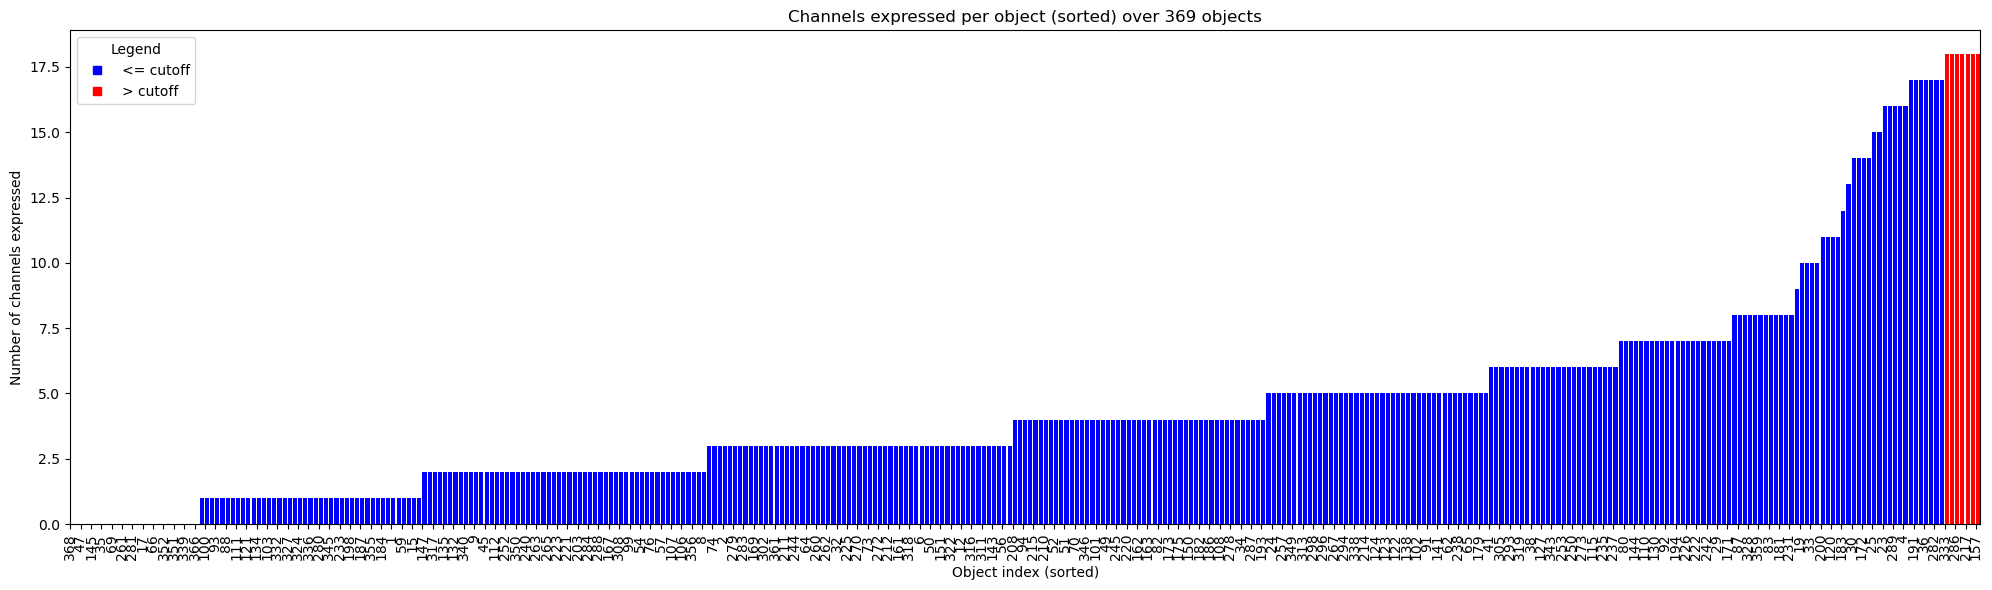

In [21]:
# number of channels expressing
cutoff = 17

# find the object indices that exceed the cutoff
high_expressors = np.where(expressions_per_object > cutoff)[0]
print(f"Indices with more than {cutoff} channels expressed:")
for idx in high_expressors:
    print(f"  Object {idx} has {expressions_per_object[idx]} channels expressed")

# sort objects by their number of channels expressed
sorted_indices = np.argsort(expressions_per_object)           # sort by ascending expression
sorted_expressions = expressions_per_object[sorted_indices]

colors = ["red" if expressions_per_object[i] > cutoff else "blue"  for i in range(total_cells)]
sorted_colors = [colors[i] for i in sorted_indices]

label_step = 2  # Show every nth x-label
plt.figure(figsize=(20, 6))

bars = plt.bar(
    range(len(sorted_expressions)),
    sorted_expressions,
    color=sorted_colors,  # highlight in red
    align="edge",
)

plt.xticks(
    range(0, len(sorted_expressions), label_step),
    sorted_indices[::label_step],
    rotation=90
)

plt.xlabel("Object index (sorted)")
plt.ylabel("Number of channels expressed")
plt.title(
    f"Channels expressed per object (sorted) over {total_cells} objects"
)

plt.legend(handles=[
    plt.Line2D([0],[0], color='blue', marker='s', linestyle='None', label='<= cutoff'),
    plt.Line2D([0],[0], color='red',  marker='s', linestyle='None', label='> cutoff')
], title="Legend")

plt.tight_layout()
plt.margins(x=0)
plt.show()

In [22]:
high_expressors

array([148, 157, 217, 268, 286, 307, 333])

In [23]:
for index in high_expressors:
    print(index, np.mean(discrete[index]))

148 210.26666458129833
157 181.37467432763856
217 226.19487279508837
268 225.06993689001987
286 122.38125575626363
307 237.0539131234845
333 130.20193872551155


In [24]:
# this is to get the object id of each neurite in the barcode_data

def get_nth_key(dictionary, n=0):
    if n < 0:
        n += len(dictionary)
    for i, key in enumerate(dictionary.keys()):
        if i == n:
            return key
    raise IndexError("dictionary index out of range")
    
key = get_nth_key(barcode_data, n=284)
val = barcode_data[key]

print(key, val['discrete'])

1307 [165.5320883425357, 0.0, 1.1109229328470396, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06646694562432005, 1.0795231672728052, 0.09620710140425649, 0.0679716603904988, 1.2079430972670442, 0.48185412467329314, 0.23098193715925147, 154.70458446043352, 0.2410092159500379, 0.13057446465647973]


In [25]:
for index in high_expressors:
    skeleton = get_nth_key(barcode_data, n=index)
    print(skeleton)

1296
1439
1418
1325
230
1385
1320


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


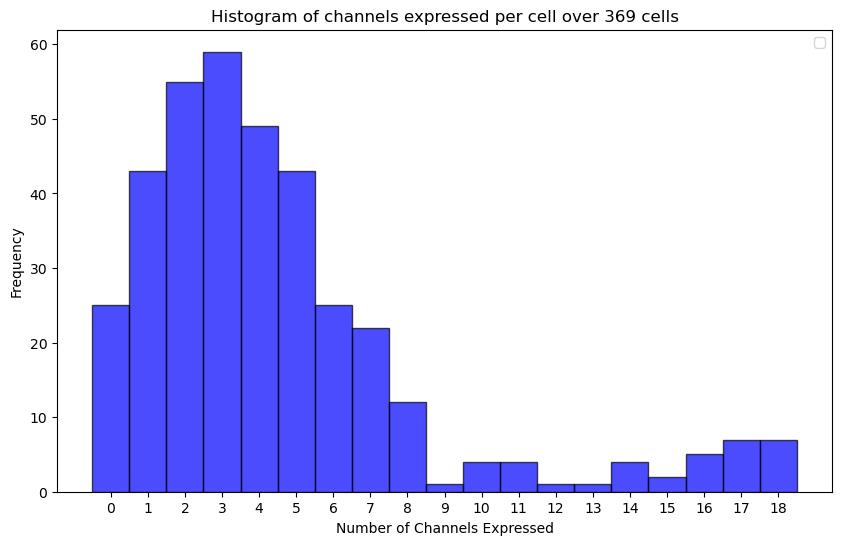

In [26]:
plt.figure(figsize=(10, 6))

bins = np.arange(-0.5, thresholded.shape[1] + 1.5)
plt.hist(
    expressions_per_object,
    bins=bins,
    color="blue",
    alpha=0.7,
    edgecolor="black",
)
plt.xlabel("Number of Channels Expressed")
plt.ylabel("Frequency")
plt.title(
    "Histogram of channels expressed per cell"
    f" over {total_cells} cells"
)
plt.xticks(
    np.arange(0, thresholded.shape[1] + 1)
)  # Adjusting ticks to align with integer values of expressions
plt.legend()

In [27]:
# compute distance matrix
dist = distance.pdist(thresholded, metric="hamming")
matrix = distance.squareform(dist)

# Set values close to zero, directly to zero (for cosine precision)
matrix[matrix < 1e-10] = 0

matrix

array([[0.        , 0.66666667, 0.66666667, ..., 0.61111111, 0.55555556,
        0.61111111],
       [0.66666667, 0.        , 0.22222222, ..., 0.05555556, 0.11111111,
        0.05555556],
       [0.66666667, 0.22222222, 0.        , ..., 0.16666667, 0.22222222,
        0.16666667],
       ...,
       [0.61111111, 0.05555556, 0.16666667, ..., 0.        , 0.05555556,
        0.        ],
       [0.55555556, 0.11111111, 0.22222222, ..., 0.05555556, 0.        ,
        0.05555556],
       [0.61111111, 0.05555556, 0.16666667, ..., 0.        , 0.05555556,
        0.        ]])

In [28]:
bit_differences = matrix * thresholded.shape[1]

max_bit_difference = int(np.max(bit_differences))
bins = np.arange(0, max_bit_difference + 1)

rows, columns = bit_differences.shape
flat = bit_differences.reshape(rows * columns)

print(flat)

[ 0. 12. 12. ...  0.  1.  0.]


[ 0  0  0 ... 18 18 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


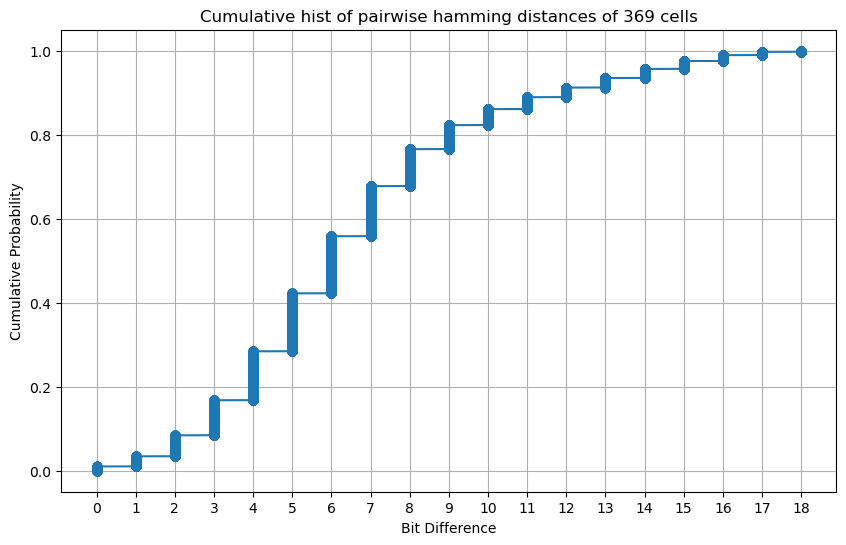

In [29]:
# Plotting the cumulative histogram
plt.figure(figsize=(10, 6))

# sort the data in ascending order
x = np.sort(flat).astype(int)

print(x)

num_cells = x.shape[0]

# get the cdf values of y
y = np.arange(num_cells) / float(num_cells)

print(x_positions)

plt.plot(x, y, marker="o")
plt.xlabel("Bit Difference")
plt.xticks(list(range(num_columns+1)))
plt.ylabel("Cumulative Probability")
plt.title(
    "Cumulative hist of pairwise hamming distances of"
    f" {total_cells} cells"
)
plt.grid(True)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
       10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5])

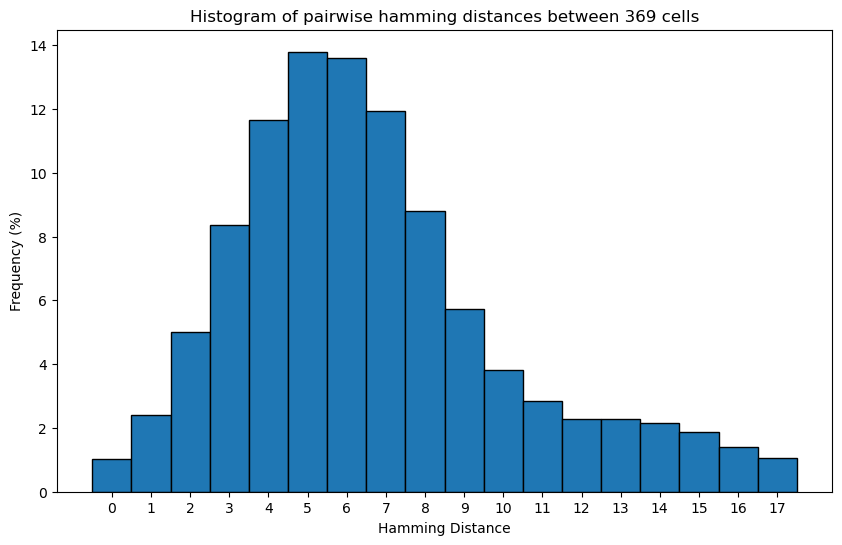

In [43]:
# Plot histogram of hamming distances
plt.figure(figsize=(10, 6))
plt.hist(flat, bins=bins, edgecolor='black', weights=np.ones_like(flat)/len(flat)*100, align='mid')
plt.xlabel("Hamming Distance")
plt.ylabel("Frequency (%)")
plt.title(f"Histogram of pairwise hamming distances between {total_cells} cells")
plt.xticks(bins[:-1] + 0.5, bins[:-1])


np.arange(-0.5, thresholded.shape[1] + 1.5)

Original data: (369, 18), Filtered data: (362, 18)


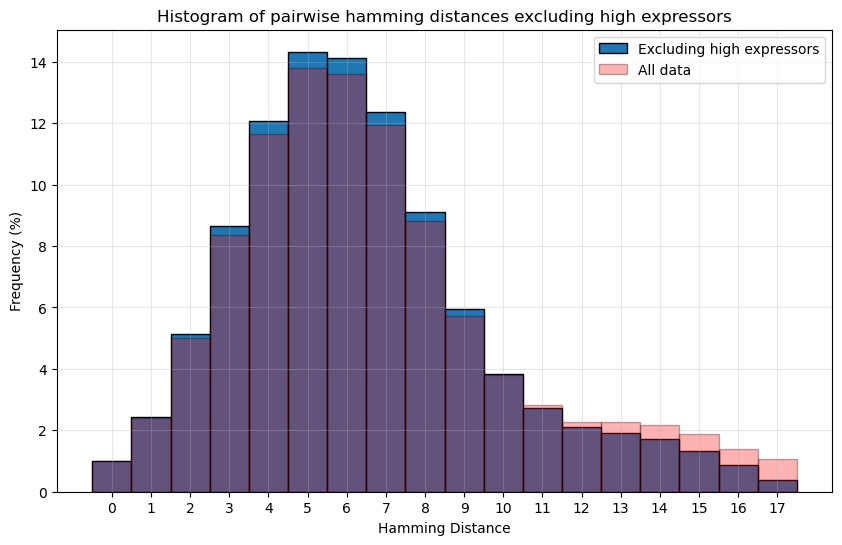

Mean hamming distance for all data: 6.66
Mean hamming distance excluding high expressors: 6.39


In [46]:

# Create a mask to exclude high expressors (neurons expressing > 17 channels)
mask = expressions_per_object <= 17  # Excludes the high expressors

# Get the filtered thresholded data
filtered_thresholded = thresholded[mask]
print(f"Original data: {thresholded.shape}, Filtered data: {filtered_thresholded.shape}")

# Compute new distance matrix on filtered data
filtered_dist = distance.pdist(filtered_thresholded, metric="hamming")
filtered_matrix = distance.squareform(filtered_dist)

# Set values close to zero, directly to zero (for precision)
filtered_matrix[filtered_matrix < 1e-10] = 0

# Convert to bit differences
filtered_bit_differences = filtered_matrix * filtered_thresholded.shape[1]

# Flatten the matrix
rows, columns = filtered_bit_differences.shape
filtered_flat = filtered_bit_differences.reshape(rows * columns)

# Plot histogram of hamming distances for filtered data
plt.figure(figsize=(10, 6))

# Get bin parameters
max_bit_difference = int(np.max(filtered_bit_differences))
bins = np.arange(0, max_bit_difference + 1)

# Create histogram with percentage frequency
plt.hist(filtered_flat, bins=bins, edgecolor='black', 
         weights=np.ones_like(filtered_flat)/len(filtered_flat)*100, align='mid')

plt.xlabel("Hamming Distance")
plt.ylabel("Frequency (%)")
plt.title(f"Histogram of pairwise hamming distances excluding high expressors")
plt.xticks(bins[:-1] + 0.5, bins[:-1])

# For comparison, add the original histogram in a different color with transparency
plt.hist(flat, bins=np.arange(0, int(np.max(bit_differences)) + 1), 
         edgecolor='black', alpha=0.3, color='red',
         weights=np.ones_like(flat)/len(flat)*100, align='mid')

plt.legend(['Excluding high expressors', 'All data'])
plt.grid(alpha=0.3)
plt.show()

# Calculate mean hamming distances
mean_all = np.mean(flat)
mean_filtered = np.mean(filtered_flat)

print(f"Mean hamming distance for all data: {mean_all:.2f}")
print(f"Mean hamming distance excluding high expressors: {mean_filtered:.2f}")


ToDo


1. Epitope distribution (simple but important!) (done)
2. Epitope distribution and correlation to the NGS sequencing of the input viral pool and input plasmid pool (sending NGS data) Want virus x imaging data, already have viral vs plasmid distribution (pretty linear)
3. Epitope distribution among different cellular structures (e.g. axons, dendrites) -> need semantic seg
4. Variation along a skeleton (may or may not be in this data). -> need skeletons
5. Epitopes observed per cell; fit a curve to this; and or highlight any oddities -> fitting curve (poisson distribution)
investigating high expressing cells
6. Unique barcodes & hamming weights in the volume/along skeletons -> (maybe take this last plot, change it to a histogram)

### Epitope distribution and correlation to the NGS sequencing of the input viral pool and input plasmid pool

In [30]:
# First let's load in the NGS data from Kathleen google sheet. 
# We want to plot the viral vs plasmid distribution of each barcode tag. 

ngs_seq = pd.read_csv("221208-pool-seq.csv")

ngs_seq.head()

,Abundance,epitope,Abundance (plasmid),Frequency (Plasmid),Abundance (AAV),Frequency (Virus),Freq. Delta,Freq. Ratio,Target
0,Lab_N8P_1_p44-maxi_pAAV-eGFP-ct3-ALFA,ALFA,129,4.22%,188,4.06%,-0.16%,-3.82%,4.76%
1,Lab_N8P_2_p45-maxi_pAAV-eGFP-ct3-AU5,AU5,216,7.07%,419,9.05%,1.98%,28.02%,4.76%
2,Lab_N8P_3_p47-maxi_pAAV-eGFP-ct3-Etag,Etag,186,6.09%,206,4.45%,-1.64%,-26.91%,4.76%
3,Lab_N8P_4_p50-maxi_pAAV-eGFP-ct3-HA,HA,195,6.38%,341,7.37%,0.98%,15.41%,4.76%
4,Lab_N8P_5_p51-maxi_pAAV-eGFP-ct3-MAT,MAT,216,7.07%,312,6.74%,-0.33%,-4.67%,4.76%


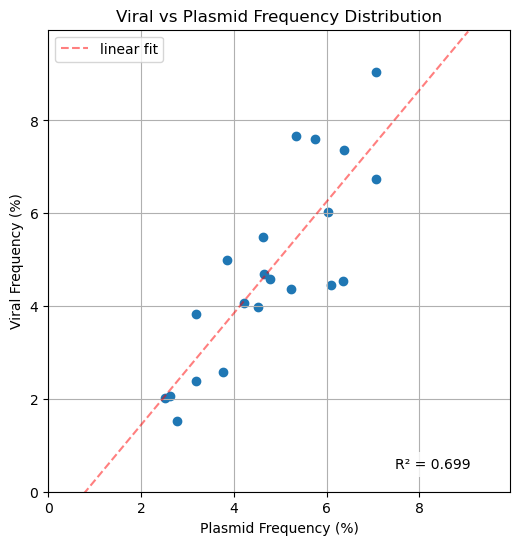

In [31]:
# we want a plot of the viral vs plasmid frequency of each barcode tag.


plt.figure(figsize=(10, 6))

# Get data and calculate max for equal axes
x = ngs_seq['Frequency (Plasmid)'].str.rstrip('%').astype(float)
y = ngs_seq['Frequency (Virus)'].str.rstrip('%').astype(float)
max_val = max(max(x), max(y))

# Create scatter plot
plt.scatter(x, y)

plt.xlabel('Plasmid Frequency (%)')
plt.ylabel('Viral Frequency (%)')
plt.title('Viral vs Plasmid Frequency Distribution')

# Calculate and plot linear regression
slope, intercept = np.polyfit(x, y, 1)
x_line = np.array([0, max_val])
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r--', alpha=0.5, label='linear fit')

# Calculate R^2
y_pred = slope * x + intercept
r_squared = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

# Add R^2 annotation
plt.annotate(f'R² = {r_squared:.3f}', 
            xy=(0.75, 0.05), 
            xycoords='axes fraction',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# Set equal axes with some padding
plt.xlim(0, max_val * 1.1)
plt.ylim(0, max_val * 1.1)
plt.gca().set_aspect('equal')

plt.grid(True)
plt.legend()


In [32]:
# now let's make this plot but comparing the viral frequency to the frequency of each barcode tag in the imaging data.
# we want to plot the viral frequency vs the frequency of each barcode tag in the imaging data.

# first, the barcodes in the imaging data are in this order, change viral pool data to match
barcodes = [
    'E2-barcode-R1',
    'S1-barcode-R1',
    'ALFA-barcode-R1',
    'Ty1-barcode-R2',
    'HA-barcode-R3',
    'T7-barcode-R6',
    'VSVG-barcode-R6',
    'AU5-barcode-R8',
    'NWS-barcode-R9',
    'SunTag-barcode-R9',
    'ETAG-barcode-R9',
    'SPOT-barcode-R10',
    'MoonTag-barcode-R10',
    'HSV Tag-barcode-R10',
    'Protein C-barcode-R11',
    'Tag100-barcode-R11',
    'c-Myc-barcode-R11',
    'OLLAS-barcode-R12'
]

ngs_seq_clean = pd.read_csv("221208-pool-seq-clean.csv")

ngs_seq_clean.tail()



,Long name,epitope,Abundance (plasmid),Frequency (Plasmid),Abundance (AAV),Frequency (Virus),Freq. Delta,Freq. Ratio,Target
13,Lab_N8P_18_p303-maxi_pAAV-eGFP-ct3-HSV,HSV,77,2.52%,94,2.03%,-0.49%,-19.43%,4.76%
14,Lab_N8P_9_p55-maxi_pAAV-eGFP-ct3-PRTC,PRTC,141,4.62%,254,5.49%,0.87%,18.89%,4.76%
15,Lab_N8P_13_p61-maxi_pAAV-eGFP-ct3-TG100,TG100,194,6.35%,210,4.54%,-1.81%,-28.56%,4.76%
16,Lab_N8P_15_p293-maxi_pAAV-eGFP-ct3-MYC,MYC,163,5.34%,355,7.67%,2.33%,43.74%,4.76%
17,Lab_N8P_8_p54-maxi_pAAV-eGFP-ct3-OLLAS,OLLAS,138,4.52%,184,3.97%,-0.54%,-12.00%,4.76%


In [45]:
# Extract virus frequency column, strip '%' characters, convert to float, and create numpy array
frequency_viral_pool = np.array(ngs_seq_clean['Frequency (Virus)'].str.rstrip('%').astype(float))

# Print the array to verify
print(frequency_viral_pool)

# Print shape and dtype to confirm it's a numpy array
print(f"Shape: {frequency_viral_pool.shape}")
print(f"Data type: {frequency_viral_pool.dtype}")

[2.38 2.57 4.06 2.07 7.37 4.69 4.99 9.05 6.03 1.53 4.45 3.82 4.58 2.03
 5.49 4.54 7.67 3.97]
Shape: (18,)
Data type: float64


In [46]:
# Plot of viral frequency vs imaging data frequency

# getting data from the imaging data
total_cells = thresholded.shape[0]

frequency_barcode_data = (counts/total_cells)*100

# getting data from the NGS data



In [47]:
frequency_barcode_data

array([29.53929539, 23.57723577, 34.68834688, 11.11111111, 21.13821138,
       21.6802168 , 18.42818428, 20.05420054, 29.26829268, 24.3902439 ,
       30.62330623, 26.28726287, 31.97831978, 31.43631436, 27.91327913,
       26.82926829, 24.93224932, 18.69918699])

In [48]:
frequency_viral_pool

array([2.38, 2.57, 4.06, 2.07, 7.37, 4.69, 4.99, 9.05, 6.03, 1.53, 4.45,
       3.82, 4.58, 2.03, 5.49, 4.54, 7.67, 3.97])

## Plot: Viral Epitope Frequency vs Imaging data epitope frequency

It appears that relative pool balance of epitopes does not correlate well with epitope detection frequency in imaging data. I would hypothesize that this is due to many factors from **1. Translation efficinecy of tags and 2. antibody capture**

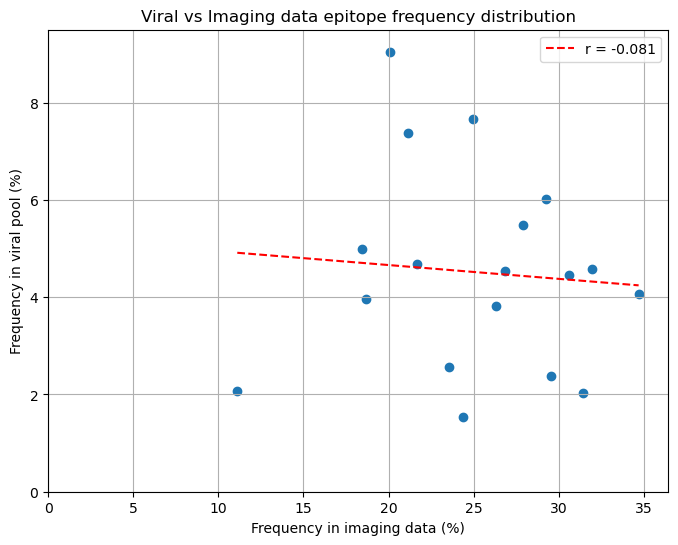

In [49]:

plt.figure(figsize=(8, 6))

# Create scatter plot
plt.scatter(frequency_barcode_data, frequency_viral_pool)

# Add axis labels
plt.xlabel('Frequency in imaging data (%)')
plt.ylabel('Frequency in viral pool (%)')
plt.title('Viral vs Imaging data epitope frequency distribution')

# Set axis to start at 0
plt.xlim(0, max(frequency_barcode_data) * 1.05)
plt.ylim(0, max(frequency_viral_pool) * 1.05)

# Add trend line
z = np.polyfit(frequency_barcode_data, frequency_viral_pool, 1)
p = np.poly1d(z)
x_range = np.linspace(min(frequency_barcode_data), max(frequency_barcode_data), 100)
plt.plot(x_range, p(x_range), "--", color="red", 
         label=f"r = {np.corrcoef(frequency_barcode_data, frequency_viral_pool)[0, 1]:.3f}")

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()

In [51]:
# Create a dictionary with the data
data = {
    'epitope': ['ALFA', 'AU5', 'Etag', 'HA', 'MAT', 'PRTC', 'SPOT', 'V5', 'VSV', 'VSVG', 'FLAG', 'HA.11', 'HIS', 'HSV', 'PRTC', 'TG100', 'MYC', 'OLLAS'],
    'viral_freq': frequency_viral_pool,
    'imaging_freq': frequency_barcode_data
}

# Create DataFrame
freq_comparison_df = pd.DataFrame(data)

# Display the DataFrame
print("\nFrequency Comparison DataFrame:")
print(freq_comparison_df)



Frequency Comparison DataFrame:
   epitope  viral_freq  imaging_freq
0     ALFA        2.38     29.539295
1      AU5        2.57     23.577236
2     Etag        4.06     34.688347
3       HA        2.07     11.111111
4      MAT        7.37     21.138211
5     PRTC        4.69     21.680217
6     SPOT        4.99     18.428184
7       V5        9.05     20.054201
8      VSV        6.03     29.268293
9     VSVG        1.53     24.390244
10    FLAG        4.45     30.623306
11   HA.11        3.82     26.287263
12     HIS        4.58     31.978320
13     HSV        2.03     31.436314
14    PRTC        5.49     27.913279
15   TG100        4.54     26.829268
16     MYC        7.67     24.932249
17   OLLAS        3.97     18.699187


## Epitope distibution

### Applying a poisson fit to the data, trying subsets of the data, noting oddities

In [52]:
expressions_per_object # how many channels is expressed by each object: 369 objects


array([11,  1,  3,  2, 16,  4,  3,  2,  2,  2,  7, 14,  3,  6, 13,  1,  0,
        0, 14, 10, 16,  1, 17, 16,  5, 15,  1,  3,  4,  7, 14, 17,  3, 10,
        4,  0, 17, 16,  6,  7,  8,  6,  4,  8,  3,  2,  1,  0,  1,  4,  3,
        4,  4,  3,  2,  2,  3,  2,  4,  1,  6,  3,  5,  3,  3,  5,  0,  4,
        3,  0,  4,  4,  3,  3,  3, 10,  2,  2,  1,  3,  7,  5,  4,  8,  6,
        5,  5,  8,  1,  3,  0,  5,  7,  1,  4,  2,  1,  1,  1,  2,  1,  4,
        5,  1,  4,  2,  2,  2,  4,  1,  7,  1,  2,  3,  3,  6,  6,  2,  1,
        5, 11,  1,  5,  5,  5,  9,  7,  6,  1,  4,  7,  8,  2,  2,  1,  2,
        8,  0,  5,  4,  7,  5,  2,  3,  7,  0,  0,  2, 18,  2,  4,  3,  3,
        4,  3,  1,  7, 18,  5,  3,  5,  3,  4,  4,  3,  6,  3,  2,  2,  3,
        5,  7, 14,  4,  7,  4,  3,  4,  3,  5,  4,  8,  4, 12,  1,  3,  4,
        1,  6,  6,  7, 17,  2,  4,  7,  6,  5,  3,  1,  4, 11, 15,  5,  2,
        2,  3,  1,  8,  4,  3,  4,  3,  3,  4,  5,  4,  3, 18,  3,  5,  4,
        2,  7,  2,  3,  3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


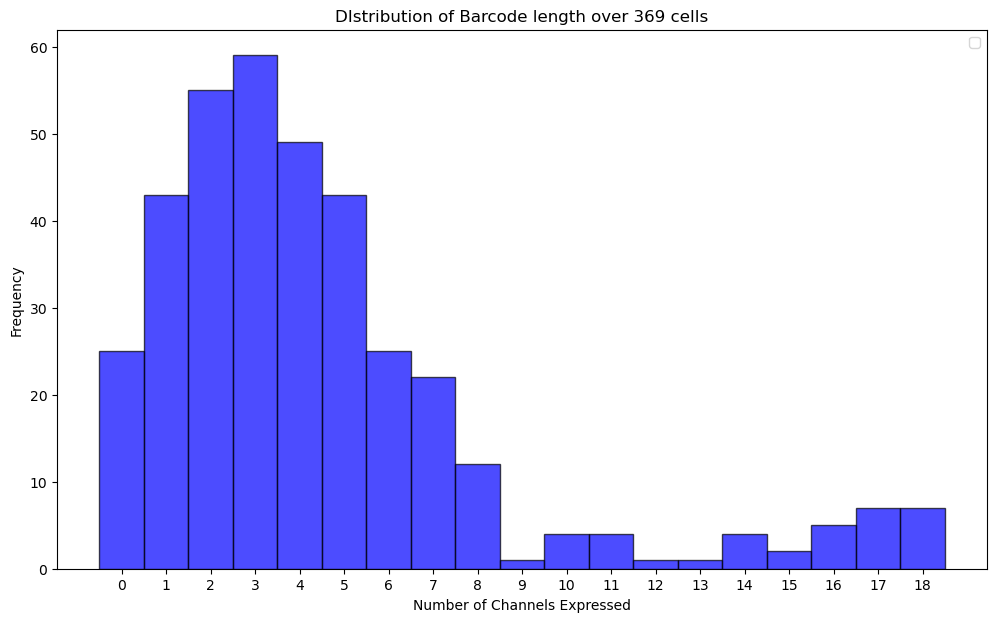

In [53]:
plt.figure(figsize=(12,7))

bins = np.arange(-0.5, thresholded.shape[1] + 1.5)

plt.hist(
    expressions_per_object,
    bins=bins,
    color="blue",
    alpha=0.7,
    edgecolor="black",
)

plt.xlabel("Number of Channels Expressed")
plt.ylabel("Frequency")
plt.title(
    "DIstribution of Barcode length"
    f" over {total_cells} cells"
)


plt.xticks(
    np.arange(0, thresholded.shape[1] + 1)
)  # Adjusting ticks to align with integer values of expressions



plt.legend()


In [54]:
mean = np.mean(expressions_per_object)
median = np.median(expressions_per_object)

print(mean)

4.5257452574525745


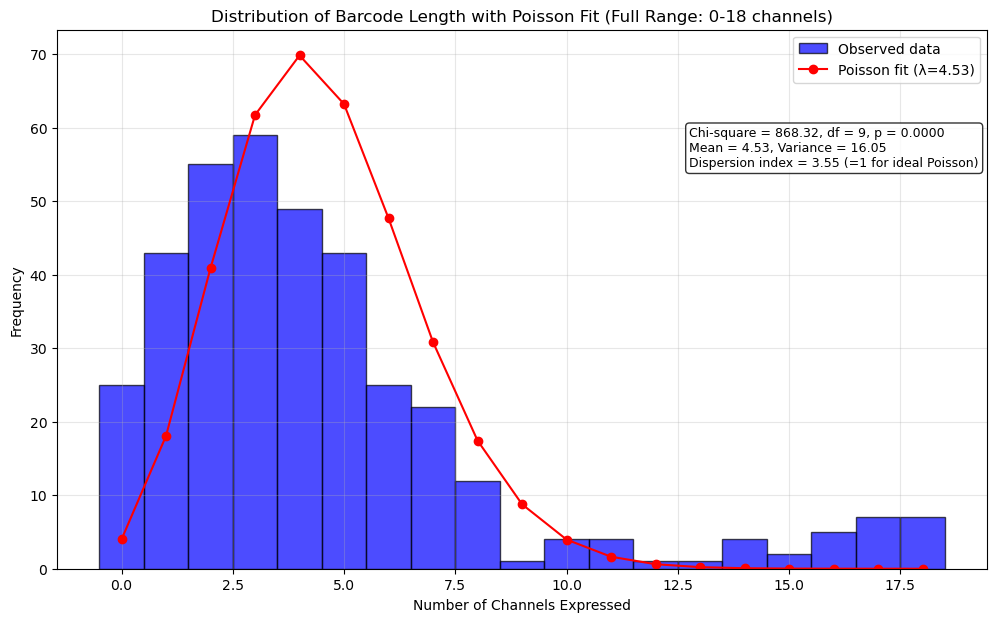

In [55]:

# Use the full dataset for Poisson fitting
full_expressions = expressions_per_object
full_mean = np.mean(full_expressions)
full_var = np.var(full_expressions)
full_total = len(full_expressions)

# Generate histogram data for the full range
hist_range = (0, 19)
hist_bins = np.arange(hist_range[0], hist_range[1] + 1) - 0.5
full_counts, _ = np.histogram(full_expressions, bins=hist_bins)

# Generate Poisson probabilities for the full range
x_poisson = np.arange(0, 19)  # 0 to 18
poisson_pmf = stats.poisson.pmf(x_poisson, full_mean)
poisson_expected_counts = poisson_pmf * full_total

# Calculate chi-square goodness of fit
observed = full_counts
expected = poisson_expected_counts
# Combine bins with expected counts < 5 (standard practice for chi-square)
valid_bins = expected >= 5
if not all(valid_bins):
    # Create combined bins for chi-square calculation only
    combined_observed = []
    combined_expected = []
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        
        if current_exp >= 5 or i == len(observed) - 1:
            combined_observed.append(current_obs)
            combined_expected.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
    dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
else:
    chi2_stat = np.sum(((observed - expected)**2) / expected)
    dof = len(observed) - 1 - 1

p_value = stats.chi2.sf(chi2_stat, dof)

# Calculate dispersion index (variance/mean) - for Poisson this should be ≈ 1
dispersion = full_var / full_mean

# Plot the results
plt.figure(figsize=(12, 7))

# Plot histogram of full observed data
plt.hist(full_expressions, bins=hist_bins, alpha=0.7, 
         color='blue', label='Observed data', edgecolor='black')

# Plot Poisson PMF for full range
plt.plot(x_poisson, poisson_expected_counts, 'ro-', 
         label=f'Poisson fit (λ={full_mean:.2f})')

# Add statistical information to the plot
stats_text = f"Chi-square = {chi2_stat:.2f}, df = {dof}, p = {p_value:.4f}\n"
stats_text += f"Mean = {full_mean:.2f}, Variance = {full_var:.2f}\n"
stats_text += f"Dispersion index = {dispersion:.2f} (=1 for ideal Poisson)"
plt.annotate(stats_text, xy=(0.68, 0.82), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
             va='top', fontsize=9)

plt.xlabel('Number of Channels Expressed')
plt.ylabel('Frequency')
plt.title('Distribution of Barcode Length with Poisson Fit (Full Range: 0-18 channels)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [56]:
print(thresholded.shape)

(369, 18)


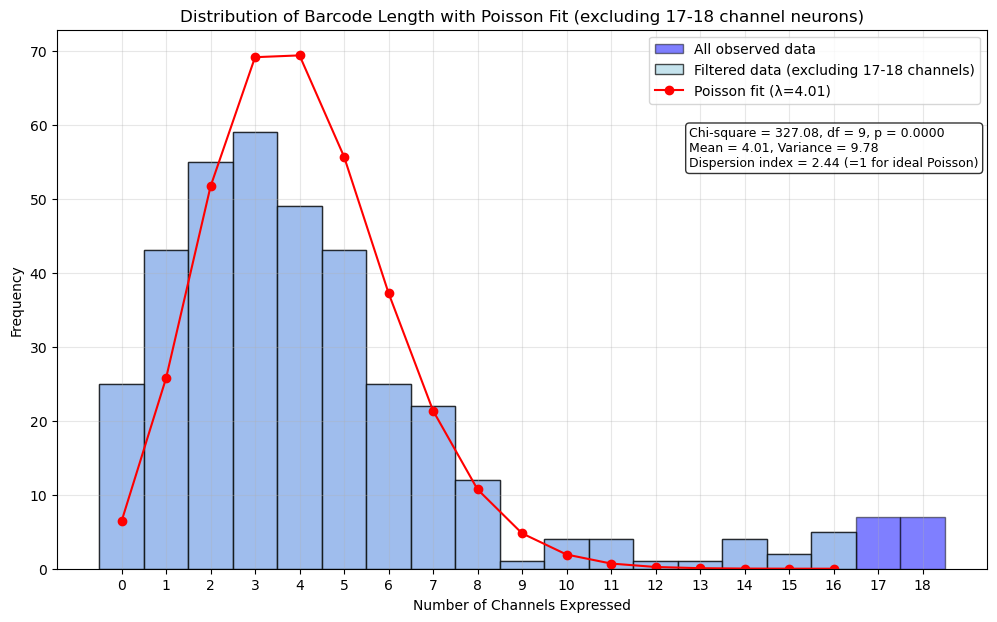

In [57]:
# Create a filtered dataset excluding 17 and 18 channel neurons
filtered_indices = expressions_per_object < 17
filtered_expressions = expressions_per_object[filtered_indices]

# Calculate stats for the filtered dataset
filtered_mean = np.mean(filtered_expressions)
filtered_var = np.var(filtered_expressions)
filtered_total = len(filtered_expressions)

# Generate histogram data for the filtered range
hist_range = (0, 17)
hist_bins = np.arange(hist_range[0], hist_range[1] + 1) - 0.5
filtered_counts, _ = np.histogram(filtered_expressions, bins=hist_bins)

# Generate Poisson probabilities for the filtered range
x_poisson = np.arange(0, 17)  # 0 to 16
poisson_pmf = stats.poisson.pmf(x_poisson, filtered_mean)
poisson_expected_counts = poisson_pmf * filtered_total


# Calculate chi-square goodness of fit
observed = filtered_counts
expected = poisson_expected_counts
# Combine bins with expected counts < 5 (standard practice for chi-square)
valid_bins = expected >= 5
if not all(valid_bins):
    # Create combined bins for chi-square calculation only
    combined_observed = []
    combined_expected = []
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        
        if current_exp >= 5 or i == len(observed) - 1:
            combined_observed.append(current_obs)
            combined_expected.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
    dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
else:
    chi2_stat = np.sum(((observed - expected)**2) / expected)
    dof = len(observed) - 1 - 1

p_value = stats.chi2.sf(chi2_stat, dof)

# Calculate dispersion index (variance/mean) - for Poisson this should be ≈ 1
dispersion = filtered_var / filtered_mean

# Plot the results
plt.figure(figsize=(12, 7))

# Plot histogram of full observed data
plt.hist(expressions_per_object, bins=np.arange(0, 20) - 0.5, alpha=0.5, 
         color='blue', label='All observed data', edgecolor='black')

# Plot histogram of filtered data
plt.hist(filtered_expressions, bins=hist_bins, alpha=0.7, 
         color='lightblue', label='Filtered data (excluding 17-18 channels)', edgecolor='black')

# Plot Poisson PMF for filtered range
plt.plot(x_poisson, poisson_expected_counts, 'ro-', 
         label=f'Poisson fit (λ={filtered_mean:.2f})')

# Add statistical information to the plot
stats_text = f"Chi-square = {chi2_stat:.2f}, df = {dof}, p = {p_value:.4f}\n"
stats_text += f"Mean = {filtered_mean:.2f}, Variance = {filtered_var:.2f}\n"
stats_text += f"Dispersion index = {dispersion:.2f} (=1 for ideal Poisson)"
plt.annotate(stats_text, xy=(0.68, 0.82), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
             va='top', fontsize=9)

plt.xlabel('Number of Channels Expressed')
plt.ylabel('Frequency')
plt.title('Distribution of Barcode Length with Poisson Fit (excluding 17-18 channel neurons)')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, 19, 1))
plt.show()

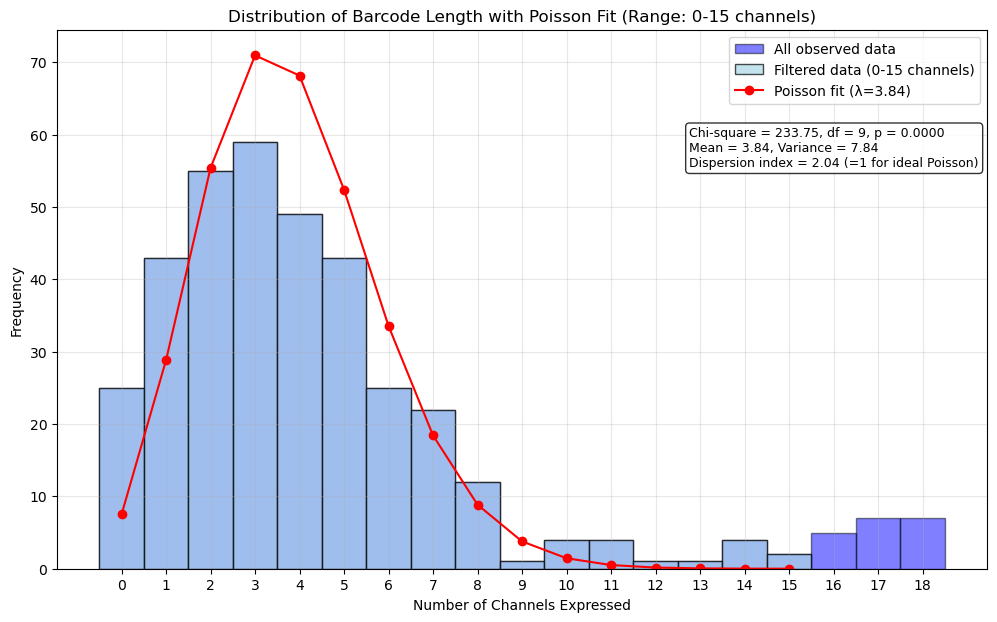

In [58]:
# plot poisson fit on 0-15 channels

# We'll use the existing expressions_per_object array directly
# Create a filtered dataset excluding 16-18 channel neurons (limit to 0-15)
filtered_indices = expressions_per_object <= 15
filtered_expressions = expressions_per_object[filtered_indices]

# Calculate stats for the filtered dataset
filtered_mean = np.mean(filtered_expressions)
filtered_var = np.var(filtered_expressions)
filtered_total = len(filtered_expressions)

# Generate histogram data for the filtered range
hist_range = (0, 16)
hist_bins = np.arange(hist_range[0], hist_range[1] + 1) - 0.5
filtered_counts, _ = np.histogram(filtered_expressions, bins=hist_bins)

# Generate Poisson probabilities for the filtered range
x_poisson = np.arange(0, 16)  # 0 to 15
poisson_pmf = stats.poisson.pmf(x_poisson, filtered_mean)
poisson_expected_counts = poisson_pmf * filtered_total

# Calculate chi-square goodness of fit
observed = filtered_counts
expected = poisson_expected_counts
# Combine bins with expected counts < 5 (standard practice for chi-square)
valid_bins = expected >= 5
if not all(valid_bins):
    # Create combined bins for chi-square calculation only
    combined_observed = []
    combined_expected = []
    current_obs = 0
    current_exp = 0
    
    for i in range(len(observed)):
        current_obs += observed[i]
        current_exp += expected[i]
        
        if current_exp >= 5 or i == len(observed) - 1:
            combined_observed.append(current_obs)
            combined_expected.append(current_exp)
            current_obs = 0
            current_exp = 0
    
    chi2_stat = np.sum(((np.array(combined_observed) - np.array(combined_expected))**2) / np.array(combined_expected))
    dof = len(combined_observed) - 1 - 1  # bins - 1 - parameters estimated (1 for lambda)
else:
    chi2_stat = np.sum(((observed - expected)**2) / expected)
    dof = len(observed) - 1 - 1

p_value = stats.chi2.sf(chi2_stat, dof)

# Calculate dispersion index (variance/mean) - for Poisson this should be ≈ 1
dispersion = filtered_var / filtered_mean

# Plot the results
plt.figure(figsize=(12, 7))

# Plot histogram of full observed data
plt.hist(expressions_per_object, bins=np.arange(0, 20) - 0.5, alpha=0.5, 
         color='blue', label='All observed data', edgecolor='black')


# Plot histogram of filtered data
plt.hist(filtered_expressions, bins=hist_bins, alpha=0.7, 
         color='lightblue', label='Filtered data (0-15 channels)', edgecolor='black')

# Plot Poisson PMF for filtered range
plt.plot(x_poisson, poisson_expected_counts, 'ro-', 
         label=f'Poisson fit (λ={filtered_mean:.2f})')

# Add statistical information to the plot
stats_text = f"Chi-square = {chi2_stat:.2f}, df = {dof}, p = {p_value:.4f}\n"
stats_text += f"Mean = {filtered_mean:.2f}, Variance = {filtered_var:.2f}\n"
stats_text += f"Dispersion index = {dispersion:.2f} (=1 for ideal Poisson)"
plt.annotate(stats_text, xy=(0.68, 0.82), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
             va='top', fontsize=9)

plt.xlabel('Number of Channels Expressed')
plt.ylabel('Frequency')
plt.title('Distribution of Barcode Length with Poisson Fit (Range: 0-15 channels)')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(np.arange(0, 19, 1))
plt.show()

In [60]:
print(filtered_total)

350


### Notes about Barcode length distribution

1. With a mean of 4.5 epitopes expressed per cell, most neurons are expressing a relatively few of the possible epitopes. In a combinatorial regime, the "ideal occupancy" is if each cell expresses 50% of the possible epitopes however the distribution is skewed towards fewer channels being expressed
2. The distibution resembles poisson like however appears more dispersed than a pure poisson would predict. Notably, a subpopulation of neurons are expressing a large number of epitopes (16-18 channels).


Do we know cell types for the segments? 
